In [1]:
# Airbnb Data Preparation and Cleaning Workshop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import math
from statistics import median
from statistics import mean

df = pd.read_csv("original_renamed_reco_train.csv")
df.head(10)
len(df)

9999

In [2]:
#remove report date as they are all the same
df['report_date'].unique()
df = df.drop('report_date', axis='columns')

# remove customer index remove
df = df.drop("customer_id", axis='columns')

#impute na gross income with median
count = df['gross_income'].isna().sum()
df['gross_income'] = df['gross_income'].fillna(df['gross_income'].median())
df.head(10)

#
age_new = df.iloc[:,3]
print(len(age_new))

age_new[1020:1040]
new = []
for i in age_new:
    if i != ' NA':
        new.append(int(i))


9999


In [3]:
med = median(new)
med
age = []

for i in age_new:
    if i !=' NA':
        age.append(int(i))
    else:
        age.append(med)
age[1020:1040]
df['age'] = age

df['country_residence'].unique()
#has NA and many countries one hot encode
count = df['country_residence'].isna().sum()
#dropping row if column country_residenceis NA

df = df.dropna(subset=["country_residence"])
len(df)
df['gender'].unique()  

array(['H', 'V'], dtype=object)

In [4]:
# binary one hot encode
df['contract_start_date'].unique() 
#one hot encoding for many variables
df['new_customer_index'].unique() 
# binary one hot encode
df['seniority_months'].unique() 
#conversion from string to int
new = []
for i in df['seniority_months']:
    new.append(int(i))
df['seniority_months'] = new

df['customer_relation_type'].unique()
# binary one hot encode
df['residence_index'].unique()
# binary one hot encode
df['foreigner_index'].unique()
# binary one hot encode
df['join_channel'].unique()
#one hot encoding for many variables
df['deceased_index'].unique()
# binary one hot encode
df['province_name'].unique()
df = df.dropna(subset=["province_name"])
len(df)
#one hot encoding for many variables
df['customer_segment'].unique()
#one hot encoding for many variables
df['employee_index'].unique()
df = df.drop('employee_index', axis='columns')

"""
#10
(Considered central region)
'CIUDAD REAL'(central)
'SALAMANCA'(central)
'TOLEDO'(central)
'SEGOVIA'(central)
'MADRID'(centre)
'GUADALAJARA'(central)
'ALBACETE'(Central)
'SORIA'(north/centra/l)
'CUENCA'(east central)
'AVILA'(central/west)


#12
(Considered Northern region)
'ALAVA'(north)
'GIPUZKOA'(north)
'PALENCIA'(North)
'BURGOS'(north)
'NAVARRA'(north)
'CANTABRIA'(north)
'BIZKAIA'(north)
'RIOJA, LA'(North)
'ZARAGOZA'(north/east)
'TARRAGONA'(north east)
'LERIDA'(North/east)
'HUESCA'(north/east)

#11
(Considered Western region)
'ZAMORA'(West)
'CACERES'(west)
'HUELVA'(south west)
'BADAJOZ'(south/west)
'ASTURIAS'(north west)
'LEON'(north/west)
'LUGO'(North/west)
'CORUÑA, A'(north/ west)
'OURENSE'(north/ west)
'VALLADOLID'(North/West)
'PONTEVEDRA'(North West)

#9
(Considered Eastern region)
'VALENCIA'(east)
'TERUEL'(east)
'BALEARS, ILLES'(east)
'CASTELLON'(east)
'ALICANTE'(south/east)
'MURCIA'(south/east)
'ALMERIA'(south/ east)
'BARCELONA'(North east)
'GIRONA'(North east)

#10
(Considered Southern region)
'CADIZ'(south)
'JAEN'(south)
'SEVILLA'(south)
'PALMAS, LAS'(South)
'CORDOBA'(south)
'GRANADA'(south)
'SANTA CRUZ DE TENERIFE'(south)
'MELILLA'(south)
'CEUTA'(south)
'MALAGA'(south)
"""

In [5]:
province = df['province_name']
region = []
for i in province:
    if i in ['CIUDAD REAL', 'SALAMANCA','TOLEDO', 'SEGOVIA', 'MADRID', 'GUADALAJARA', 'ALBACETE', 'SORIA', 'CUENCA', 'AVILA']:
        region.append("CENTRAL")
        
    elif i in ['ALAVA', 'GIPUZKOA', 'PALENCIA', 'BURGOS', 'NAVARRA', 'CANTABRIA', 'BIZKAIA', 'RIOJA, LA', 'ZARAGOZA', 'TARRAGONA', 'LERIDA', 'HUESCA']:
        region.append("NORTH")

    elif i in ['CADIZ','JAEN', 'SEVILLA', 'PALMAS, LAS', 'CORDOBA', 'GRANADA', 'SANTA CRUZ DE TENERIFE', 'MELILLA', 'CEUTA', 'MALAGA']:          
        region.append("SOUTH")
    
    elif i in ['VALENCIA', 'TERUEL', 'BALEARS, ILLES', 'CASTELLON', 'ALICANTE', 'MURCIA', 'ALMERIA', 'BARCELONA', 'GIRONA']:
        region.append("EAST")
        
    elif i in ['ZAMORA', 'CACERES', 'HUELVA', 'BADAJOZ', 'ASTURIAS', 'LEON', 'LUGO', 'CORUÑA, A', 'OURENSE', 'VALLADOLID', 'PONTEVEDRA']:
        region.append("WEST")
    else:
        print(i)
df['province_name'] = region

print(df['province_name'])

df = df.rename(columns={'province_name': 'region'})

0         SOUTH
1       CENTRAL
2       CENTRAL
3         NORTH
4         NORTH
         ...   
9994      SOUTH
9995    CENTRAL
9996      SOUTH
9997       WEST
9998       EAST
Name: province_name, Length: 9945, dtype: object


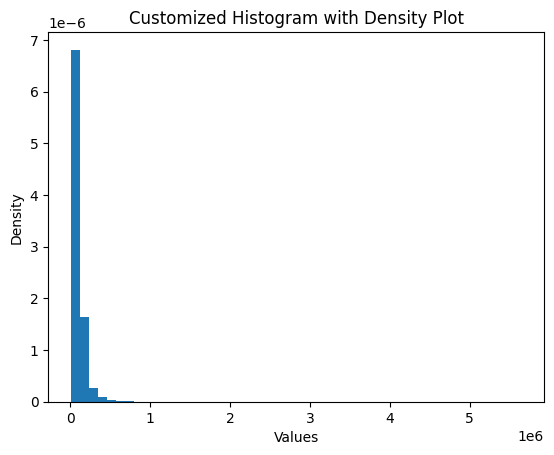

440.6276996543489
35548.74
lol
716
lol
2561
0       N
1       N
2       N
3       N
4       N
       ..
9994    N
9995    N
9996    N
9997    N
9998    N
Name: deceased_index, Length: 9945, dtype: object


In [6]:
#portion where we manipulate columns for different events

#Covid overall decrease of 10% of economy over assumed 2 years, 10/24 %

#histogram of gross income
plt.hist(df['gross_income'],bins = 50, density=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Customized Histogram with Density Plot')
plt.show() 
#results is an exponential
np.random.seed(1000)
# decrease of 10% of overall income
lambda_inv = mean(df['gross_income'])*(10/2400)

print(lambda_inv)
gross_income_dec = np.random.exponential(scale=lambda_inv, size = len(df))
gross_income_dec
final_income = []
print(df['gross_income'].loc[1])
for i in range(0,len(df)):
    inc = df['gross_income'].iloc[i]-gross_income_dec[i]
    if inc<0:
        final_income.append(0)
    else:
        final_income.append(inc)
df['gross_income'] = final_income

#overall 0.15% died over assumed 2 years, average 0.15/2400
new_deceased = []
for i in range(0,len(df)):
    if df['deceased_index'].iloc[i] == "N":
        if(np.random.rand()<(0.15/2400)):
            new_deceased = "S"
            print("lol")
            print(i)
        else:
            new_deceased = "N"
    else:
       new_deceased = "N"
print(df['deceased_index'])
df['deceased_index'] = new_deceased
